# INFO 3401 – Class 16: Datetimes and Timestamps

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
* Understanding how Python represents time using temporal objects in `datetime` and `pandas`
* Accessing and manipulating attributes of temporal objects
* Coverting data between strings and temporal objects
* Working in pandas with temporal objects

## Background

Much of the data we have worked with so far has been categorical and cross-sectional, but many of you have likely started to encounter examples of temporal data: observations that also include timestamps. Working with temporal data brings a host of challenges since dates and times can be so irregular: 60 seconds within 60 minutes within 24-hour days within 7-day weeks within 28, 29, 30, or 31-day months; time elapsed; time zones; and more! Working with temporal data is a common problem so there are powerful libraries, functions, methods, and attributes within Python to help you.

* **Class 16 (Mon)**: Fundamental of basic temporal objects in `datetime` and `pandas`  
* **Class 17 (Wed)**: Resampling and handling missing temporal data  
* **Class 18 (Fri)**: Temporal patterns and autocorrelation  

## `datetime` library

A "classic" joke among Python programmers is the very justifiable confusion between the [datetime object](https://docs.python.org/3/library/datetime.html#datetime-objects) within the [datetime module](https://docs.python.org/3/library/datetime.html).

<div>
<img src="https://external-preview.redd.it/zvDEM_ZO9yMYRHFvy4oPndpSxuBhQnUucQUASB3foOc.png?auto=webp&s=0287e0eeff39d34a6202f2ba22e733a553b38a8b" width="400"/>
</div>

<div>
<img src="https://i.redd.it/j4hy36mdzmn31.png" width="400"/>
</div>

<div>
<img src="https://memegenerator.net/img/instances/55315123/say-datetime-one-more-time.jpg" width="400"/>
</div>


Time and dates are confusing to work with, so let's take a moment to embrace the confusion and commit to working through them together.

* **`datetime`** objects contain both time and date information (year, month, day, hour, minute, second, microseconds)
* **`date`** objects contain only date information (year, month, day)
* **`time`** objects contain only time information (hour, minute, second, microseconds)

There are some additional classes within the datetime library that can also be helpful in various applications.

* **`timedelta`** is a measure of duration or difference between two dates/times/datetimes
* **`tzinfo`** is for handling time zone information.

In [1]:
import datetime

### `datetime` attributes and methods

`.now()` can get the time right now.

In [2]:
datetime.datetime(2020,10,2,11,0,0) - datetime.datetime(2020,10,1,11,0,0)

datetime.timedelta(days=1)

In [4]:
now = datetime.datetime.now()
now

datetime.datetime(2020, 9, 25, 16, 9, 10, 280234)

There's also a `.utcnow()` that gets the "[coordinated universal time](https://en.wikipedia.org/wiki/Coordinated_Universal_Time)" time (basically, the time at 0° longitude in London) rather than my system's current time.

In [5]:
utc = datetime.datetime.utcnow()
utc

datetime.datetime(2020, 9, 25, 22, 9, 53, 595904)

Make a `datetime` object for your birthday.

In [6]:
birthday = datetime.datetime(1984,2,13,7,0)
birthday

datetime.datetime(1984, 2, 13, 7, 0)

Note what happens when you try to pass a string to `datetime.datetime`. We will discuss how to move between strings and `datetime` using `strptime` below.

In [7]:
datetime.datetime('2020-09-25')

TypeError: an integer is required (got type str)

There are a variety of attributes and methods we can call on a datetime object to extract relevant information.

Methods for converting from `datetime` objects to `date` or `time` objects.

In [10]:
now.date()

datetime.date(2020, 9, 25)

In [11]:
now.time()

datetime.time(16, 9, 10, 280234)

Attributes of a `date`, `time`, or `datetime` object:
* **`.year`**
* **`.month`**
* **`.day`**
* **`.hour`**
* **`.minute`**
* **`.second`**
* **`.year`**

In [15]:
now.hour, now.minute, now.second

(16, 9, 10)

There are some other conversion methods that are powerful:

* **`.weekday()`**
* **`.isoweekday()`**
* **`.isoformat()`**

In [18]:
now.isoformat()

'2020-09-25T16:09:10.280234'

### `strftime` vs. `strptime`

Dates and times are often stored as strings like "2020-07-04" or "07\04\2020" to represent July 4, 2020 in the U.S. or April 7, 2020 in Europe (see? dates and times can be really frustrating!): [Date format by country](https://en.wikipedia.org/wiki/Date_format_by_country).

If you want to convert a string to a datetime object, you use `strptime`. If you want to convert a datetime object to a string, you use `strftime`. These use a common "grammar" for representing temporal elements (years, months, days, hours, minutes, seconds, weekdays, *etc.*): [strftime and strptime Behavior](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) Some of the most common elements of this format:

* `%A` - Weekday full name
* `%d` - Day of the month number as a zero-padded decimal
* `%B` - Month full name
* `%m` - Month number as a zero-padded decimal
* `%Y` - Year with century (typically four digits)
* `%H` - 24-hour clock hour as a zero-padded decimal
* `%M` - Minute as a zero-padded decimal
* `%S` - Second as a zero-padded decimal

There are others like day of the year, week of the year, timezones, *etc*.

Convert a datetime into a string using `strftime(format)`.

In [29]:
datetime.datetime(2020,7,4).strftime('%A! %B %d, %Y')

'Saturday! July 04, 2020'

Convert a string into a datetime using `strptime(date_string, format)`.

In [41]:
str_time = datetime.datetime.strptime('Friday, September 25, 2020 4:10 pm', '%A, %B %d, %Y %H:%M %p')
str_time

datetime.datetime(2020, 9, 25, 4, 10)

### Unix timestamps

Sometimes computer scientists represent time as the number of seconds elapsed since midnight on January 1, 1970. That moment was second 0 and every second since then is incremented. This is popularly known as "[Unix time](https://en.wikipedia.org/wiki/Unix_time)" or the "Unix epoch". 

Many of you are too young to remember the panic around the [Y2K problem](https://en.wikipedia.org/wiki/Year_2000_problem) when computers that represented time as a two digit number made 2000 indistinguishable from 1900. But there's a much bigger problem known as the [Year 2038 problem](https://en.wikipedia.org/wiki/Year_2038_problem) when 32-bit computing systems that keep track of time using Unix timestamps will similarly be confused on January 19, 2038 whether it is 1901, 1970, or 2038. 32-bit systems can't store numbers larger than $2^{31} - 1$ or 2,147,483,647. The date  2,147,483,647 seconds after January 1, 1970 is January 19, 2038 at 3:14:07 UTC. Mark that date in your calendars when a lot of basic social and technical infrastructure relying on any kind of computing devices is at risk of failure.

<div>
<img src="https://imageproxy.ifunny.co/crop:x-20,resize:320x,crop:x800,quality:90x75/images/4810476c0d383f6210bb02cb8e26eafbfd0803104b91da23abae4446d31ada53_1.jpg" width="400"/>
</div>

You can convert a `datetime` object into its Unix time with `.timestamp()` method.

In [43]:
now.timestamp()

1601071750.280234

You can also convert from Unix timestamps you encounter in the wild to datetime objects with the `fromtimestamp` method.

In [48]:
datetime.datetime.fromtimestamp(111111111)

datetime.datetime(1973, 7, 9, 18, 11, 51)

What happens to your computer when you call `timestamp()` on a `datetime` from January 20, 2038?

In [52]:
datetime.datetime(2038,1,20).timestamp()

2147583600.0

### `timedelta`

We can also do operations on `datetime` objects, like computing the amount of time between two datetimes.

In [56]:
now

datetime.datetime(2020, 9, 25, 16, 9, 10, 280234)

In [57]:
birthday

datetime.datetime(1984, 2, 13, 7, 0)

In [58]:
now - birthday

datetime.timedelta(days=13374, seconds=32950, microseconds=280234)

You can also use a `timedelta` to perform operations on a `datetime` object.

In [76]:
birthday - datetime.timedelta(weeks=40)

datetime.datetime(1983, 5, 9, 7, 0)

Finally, you can convert `timedelta` objects into simpler `float` or `int` objects.

In [77]:
(now - birthday)/datetime.timedelta(seconds=60)

19259109.171337232

## Dates and time in `pandas`

pandas has its own type of object called a [`Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) for representing time, dates, and datetimes that is distinct from `datetime`. There are good reasons for pandas to have its own representation, but it can definitely be frustrating and annoying having to juggle two distinct, sometimes compatible, and sometimes incompatible representations of dates and times within Python.

In [156]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

### `Timestamp`

One of the biggest and most powerful differences between datetime's `datetime` and panda's `Timestamp` is that `Timestamp` will automatically recognize and convert strings to `Timestamp`s without needing you to use the gnarly `strftime`/`strptime` syntax. 

Note that pandas's `Timestamp` is very, *very*, **very** different from the Unix time `.timestamp()` method in `datetime`.

Make a `Timestamp` object for today.

In [83]:
ts_now = pd.Timestamp('2020-09-25 16:10')
ts_now

Timestamp('2020-09-25 16:10:00')

Make a `Timestamp` for your birthday.

Timestamp('1984-02-13 07:00:00')

Pass a `datetime` object to `Timestamp`.

In [ ]:
ts_birthday = pd.Timestamp(birthday)
ts_birthday

Pass a UNIX timestamp to `Timestamp`.

In [89]:
ts_unix = pd.Timestamp(1111111111,unit='s')
ts_unix

Timestamp('2005-03-18 01:58:31')

In [92]:
type(ts_birthday)

pandas._libs.tslibs.timestamps.Timestamp

In [91]:
type(birthday)

datetime.datetime

### New attributes and methods

pandas's `Timestamp` objects have many of the same attributes and methods found for `datetime` objects but they also have some [additional attributes and methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) (look in menu on left). I haven't used these often in practice, but they must be useful for enough people.

* ``.quarter`` - What quarter of the year a date is in
* ``.is_leap_year`` - Boolean for whether the current year is a leap year
* ``.to_pydatetime()`` - convert a Timestamp to a datetime

Experiment to see which of the `datetime` methods and attributes (from above) also work on `Timestamp` objects.

In [98]:
ts_birthday.to_pydatetime()

datetime.datetime(1984, 2, 13, 7, 0)

Try out some of the `Timestamp`-specific attributes and methods.

### to_datetime

Just like pandas's `Timestamp` can auto-magically convert all different kinds of date and time representations to a consistent representation, the `to_datetime()` function can take an array of misshapen and inconsistently typed objects that look like dates and convert them into an array of Timestamps.

Make an array with different representations of dates and see what `to_datetime` does with them.

In [99]:
misshapen_data = ['July 4, 2020','9/11/01',datetime.datetime(1984,2,13,7),datetime.date(2006,6,6)]
misshapen_data

['July 4, 2020',
 '9/11/01',
 datetime.datetime(1984, 2, 13, 7, 0),
 datetime.date(2006, 6, 6)]

In [100]:
pd.to_datetime(misshapen_data)

DatetimeIndex(['2020-07-04 00:00:00', '2001-09-11 00:00:00',
               '1984-02-13 07:00:00', '2006-06-06 00:00:00'],
              dtype='datetime64[ns]', freq=None)

If you read in a CSV file that has datetime information represented as strings, you have at least two options for converting those string representations into `Timestamp` objections.

The first option is to pass the column names to the "parse_dates" option within [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) (or [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html), [`read_sql`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html), *etc*.).

Download the "sp500_close_volume.csv" file from Canvas to the folder where this notebook is running and read it into this notebook as  `sp500_df` and parsing the "Date" column.

In [106]:
sp500_df = pd.read_csv('sp500_close_volume.csv',parse_dates=['Date'])
sp500_df.head()

,Date,Adj Close,Volume
0,2017-01-03,2257.830078,3770530000
1,2017-01-04,2270.750000,3764890000
2,2017-01-05,2269.000000,3761820000
3,2017-01-06,2276.979980,3339890000
4,2017-01-09,2268.899902,3217610000


In [107]:
sp500_df.loc[0,'Date']

Timestamp('2017-01-03 00:00:00')

The second option is to mutate/convert the column with the dates after they've already been read in. You can use `to_datetime` on the Series or DataFrame column (but I repeat myself!) to convert those values from string to `Timestamp`s and overwrite the previous values.

Read the "sp500_close_volume.csv" file into this notebook without parsing the column as `sp500_df` and then use the `to_datetime` function on the "Date" column to convert it to Timestamps.

In [109]:
sp500_df = pd.read_csv('sp500_close_volume.csv')
sp500_df.head()

,Date,Adj Close,Volume
0,2017-01-03,2257.830078,3770530000
1,2017-01-04,2270.750000,3764890000
2,2017-01-05,2269.000000,3761820000
3,2017-01-06,2276.979980,3339890000
4,2017-01-09,2268.899902,3217610000


In [113]:
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

In [114]:
sp500_df.loc[0,'Date']

Timestamp('2017-01-03 00:00:00')

### `date_range`

Because pandas is designed for tabular data with long arrays of values rather than single values, how do you make a range of dates? The [`date_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html) function has a number of parameters for creating an array of dates/times. The key parameters for this function are:

* start - when to start the range
* end - when to end the range
* freq - what frequency in between these dates? Defaults to daily, but [other aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases) are possible

Make an array of daily Timestamps for just September 2020.

In [128]:
pd.date_range(start='September 1, 2020',end='September 30, 2020',freq='H')

DatetimeIndex(['2020-09-01 00:00:00', '2020-09-01 01:00:00',
               '2020-09-01 02:00:00', '2020-09-01 03:00:00',
               '2020-09-01 04:00:00', '2020-09-01 05:00:00',
               '2020-09-01 06:00:00', '2020-09-01 07:00:00',
               '2020-09-01 08:00:00', '2020-09-01 09:00:00',
               ...
               '2020-09-29 15:00:00', '2020-09-29 16:00:00',
               '2020-09-29 17:00:00', '2020-09-29 18:00:00',
               '2020-09-29 19:00:00', '2020-09-29 20:00:00',
               '2020-09-29 21:00:00', '2020-09-29 22:00:00',
               '2020-09-29 23:00:00', '2020-09-30 00:00:00'],
              dtype='datetime64[ns]', length=697, freq='H')

In [ ]:
pd.date_range(start='2020-09-01',end='2020-09-30')

Make an array of hourly `Timestamps` just for today.

In [136]:
pd.date_range(start='2020-09-25 00:00',periods=24,freq='H')

DatetimeIndex(['2020-09-25 00:00:00', '2020-09-25 01:00:00',
               '2020-09-25 02:00:00', '2020-09-25 03:00:00',
               '2020-09-25 04:00:00', '2020-09-25 05:00:00',
               '2020-09-25 06:00:00', '2020-09-25 07:00:00',
               '2020-09-25 08:00:00', '2020-09-25 09:00:00',
               '2020-09-25 10:00:00', '2020-09-25 11:00:00',
               '2020-09-25 12:00:00', '2020-09-25 13:00:00',
               '2020-09-25 14:00:00', '2020-09-25 15:00:00',
               '2020-09-25 16:00:00', '2020-09-25 17:00:00',
               '2020-09-25 18:00:00', '2020-09-25 19:00:00',
               '2020-09-25 20:00:00', '2020-09-25 21:00:00',
               '2020-09-25 22:00:00', '2020-09-25 23:00:00'],
              dtype='datetime64[ns]', freq='H')

Make an array of just business days from January 1, 2020 to today. (Look up the [alias for business day frequency](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)).

In [137]:
pd.date_range(start='2020-01-01',end='2020-09-25',freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17',
               '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25'],
              dtype='datetime64[ns]', length=193, freq='B')

Make an array of quarter starts from January 1, 2000 to today.

In [139]:
pd.date_range(start='2000-01-01',end='2020-09-25',freq='QS')

DatetimeIndex(['2000-01-01', '2000-04-01', '2000-07-01', '2000-10-01',
               '2001-01-01', '2001-04-01', '2001-07-01', '2001-10-01',
               '2002-01-01', '2002-04-01', '2002-07-01', '2002-10-01',
               '2003-01-01', '2003-04-01', '2003-07-01', '2003-10-01',
               '2004-01-01', '2004-04-01', '2004-07-01', '2004-10-01',
               '2005-01-01', '2005-04-01', '2005-07-01', '2005-10-01',
               '2006-01-01', '2006-04-01', '2006-07-01', '2006-10-01',
               '2007-01-01', '2007-04-01', '2007-07-01', '2007-10-01',
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
      

### Indexing and slicing with timestamps

We often will use the Timestamp as an index, which means we'll want a way to access and slice different parts of the index.

Use the `.set_index()` method to make the "Date" column an index for `sp500_df`.

In [142]:
sp500_df.set_index('Date',inplace=True)

In [148]:
sp500_df.head()

,Adj Close,Volume
Date,,
2017-01-03,2257.830078,3770530000
2017-01-04,2270.750000,3764890000
2017-01-05,2269.000000,3761820000
2017-01-06,2276.979980,3339890000
2017-01-09,2268.899902,3217610000


Access the row for March 23, 2020.

In [150]:
sp500_df.loc['2020 March 23']

Adj Close    2.237400e+03
Volume       7.402180e+09
Name: 2020-03-23 00:00:00, dtype: float64

Access the rows for March 1, 2020 through March 31, 2020 and make a plot of "Adj Close".

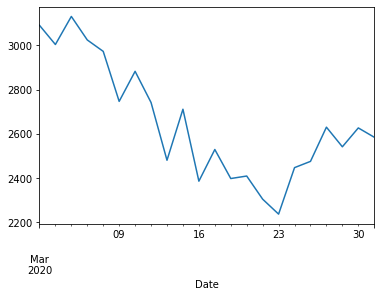

In [157]:
sp500_df.loc['2020-03-01':'2020-03-31','Adj Close'].plot()

In [159]:
sp500_df.loc[datetime.datetime(2020,3,1):datetime.datetime(2020,3,31)]

,Adj Close,Volume
Date,,
2020-03-02,3090.229980,6376400000
2020-03-03,3003.370117,6355940000
2020-03-04,3130.120117,5035480000
2020-03-05,3023.939941,5575550000
2020-03-06,2972.370117,6552140000
2020-03-09,2746.560059,8423050000
2020-03-10,2882.229980,7635960000
2020-03-11,2741.379883,7374110000
2020-03-12,2480.639893,8829380000


Access the rows for April 1, 2020 through the present and make a plot of "Volume".

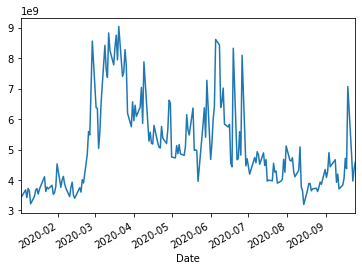

In [163]:
sp500_df.loc['2020-01-01':,'Volume'].plot()

## Appendix

In [32]:
# Download the data about the S&P 500 index since January 2017
import yfinance as yf

sp500_df = yf.download(tickers='^GSPC',
                         start='2017-01-01',
                         end='2020-09-25',
                         progress=False)

sp500_df[['Adj Close','Volume']].to_csv('sp500_close_volume.csv',encoding='utf8')

In [66]:
# Download hourly data for March
# Need to use a loop since the function will only let us get a week at a time

_df_l = []

dates = ['2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05']
for i,date in enumerate(dates):
    if i < 5:
        _df = yf.download(tickers='^GSPC',
                          start=dates[i],
                          end=dates[i+1],
                          interval='60m',
                          progress=False)
        _df_l.append(_df)

In [73]:
# Write out
sp500_march_df = pd.concat(_df_l)
sp500_march_df[['Adj Close','Volume']].to_csv('sp500_march_hourly.csv',encoding='utf8')